#<center>DSE 220 - Assignment 1

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
import matplotlib.pyplot as plt
%matplotlib inline

#<center>Problem 1

In [8]:
df = pd.read_csv('weather_dataset.csv')
df

,Day,outlook,temperature,humidity,windy,play
0,1,sunny,85,85,False,no
1,2,sunny,80,90,True,no
2,3,overcast,83,86,False,yes
3,4,rainy,70,96,False,yes
4,5,rainy,68,80,False,yes
5,6,rainy,65,70,True,no
6,7,overcast,64,65,True,yes
7,8,sunny,72,95,False,no
8,9,sunny,69,70,False,yes
9,10,rainy,75,80,False,yes


In [109]:
print 'Mean Temperature:\t'+str(np.mean(df['temperature']))
print 'Mean Humidity:\t\t'+str(np.mean(df['humidity']))

Mean Temperature:	73.5714285714
Mean Humidity:		81.6428571429


In [110]:
print 'Temperature Greater Than Average'
df[df['temperature']>np.mean(df['temperature'])][['outlook','play']]

Temperature Greater Than Average


,outlook,play
0,sunny,no
1,sunny,no
2,overcast,yes
9,rainy,yes
10,sunny,yes
12,overcast,yes


In [111]:
print 'Humidity Greater Than Average'
df[df['humidity']>np.mean(df['humidity'])][['outlook','play']]

Humidity Greater Than Average


,outlook,play
0,sunny,no
1,sunny,no
2,overcast,yes
3,rainy,yes
7,sunny,no
11,overcast,yes
13,rainy,no


In [113]:
df['Celcius'] = (df['temperature']-32)*(5.0/9.0)
df.head()

,Day,outlook,temperature,humidity,windy,play,Celcius
0,1,sunny,85,85,False,no,29.444444
1,2,sunny,80,90,True,no,26.666667
2,3,overcast,83,86,False,yes,28.333333
3,4,rainy,70,96,False,yes,21.111111
4,5,rainy,68,80,False,yes,20.000000


In [123]:
print '1. How often do you play tennis independent of the other attributes?\n'
print 'Probability:\t'+str(float(len(df[df['play']=='yes']))/len(df))

1. How often do you play tennis independent of the other attributes?

Probability:	0.642857142857


In [126]:
print '2. How often do you play tennis when it is "sunny"?\n'
cond1 = df['outlook']=='sunny'
cond2 = df['play']=='yes'
print 'Probability:\t'+str(float(len(df[cond1&cond2]))/len(df))

2. How often do you play tennis when it is "sunny"?

Probability:	0.142857142857


In [24]:
print '3. Compare the average, minimum and maximum temperature when you play tennis?\n'
print 'Minimum:\t'+str(df[df['temperature']==df['temperature'].min()]['outlook'].values[0])
print 'Average:\t'+str(df[df['temperature']==df['temperature'].median()]['outlook'].values)
print 'Maximum:\t'+str(df[df['temperature']==df['temperature'].max()]['outlook'].values[0])

3. Compare the average, minimum and maximum temperature when you play tennis?

Minimum:	overcast
Average:	['sunny' 'overcast']
Maximum:	sunny


In [98]:
print '4. Compare the average, minimum and maximum humidity when you play tennis?\n'
print 'Minimum:\t'+str(df[df['humidity']==df['humidity'].min()]['outlook'].values[0])
print 'Average:\t'+str(df.sort(columns=['humidity']).reset_index().ix[7:8]['outlook'].values)
print 'Maximum:\t'+str(df[df['humidity']==df['humidity'].max()]['outlook'].values[0])

4. Compare the average, minimum and maximum humidity when you play tennis?

Minimum:	overcast
Average:	['sunny' 'overcast']
Maximum:	rainy


/home/sadat/anaconda3/envs/py2k/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


5. Plot the an scatter plot (x,y diagramm) of humidity (x) and temperature (y) when you play tennis
compared to when you do not play tennis.



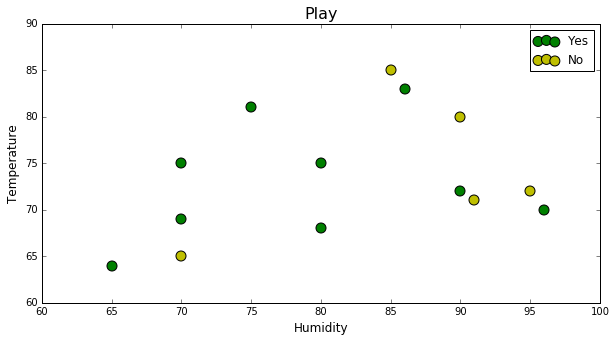

In [61]:
print '5. Plot the an scatter plot (x,y diagramm) of humidity (x) and temperature (y) when you play tennis' 
print 'compared to when you do not play tennis.\n'

hy = df[df['play']=='yes']['humidity'].values
ty = df[df['play']=='yes']['temperature'].values
hn = df[df['play']=='no']['humidity'].values
tn = df[df['play']=='no']['temperature'].values

plt.figure(figsize=(10,5))
plt.scatter(hy,ty,c='g',s=100)
plt.scatter(hn,tn,c='y',s=100)
plt.legend(['Yes','No'])
plt.title('Play',fontsize=16)
plt.xlabel('Humidity',fontsize=12)
plt.ylabel('Temperature',fontsize=12)

#<center>Problem 2

In [25]:
# This cell helps with using sed later to get where to trim the files
files = ["new_data/st0009ts.txt", "new_data/st1019ts.txt",\
         "new_data/st2029ts.txt", "new_data/st3039ts.txt",\
         "new_data/st4049ts.txt", "new_data/st5060ts.txt",\
         "new_data/st6070ts.txt", "new_data/st7080ts.txt",\
         "new_data/st8090ts.txt"]
data = ["data/st0009ts.txt", "data/st1019ts.txt",\
         "data/st2029ts.txt", "data/st3039ts.txt",\
         "data/st4049ts.txt", "data/st5060ts.txt",\
         "data/st6070ts.txt", "data/st7080ts.txt",\
         "data/st8090ts.txt"]

In [30]:
import os 
count = 0; 

for index, data_file in enumerate(data):
    
    if index == 0:
        end_line = f1[files[index]].max()
        start_line = f1[files[index]].min()
        !sed "$(($start_line-2)),$(($end_line))!d" "$data_file">>data/1st0009ts.txt
        df = pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        os.remove('data/1st0009ts.txt')
        df = df.dropna()   
        df = df.transpose()
        df.rename(columns={'U.S.': 'US'}, inplace=True)
    elif index == 1 or index == 2 or index == 3 or index == 4:
        end_line = f1[files[index]].max()
        start_line = f1[files[index]].min()
        !sed "$(($start_line-2)),$(($end_line))!d" "$data_file">>data/1st0009ts.txt
        new_df = pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        os.remove('data/1st0009ts.txt')
        new_df = new_df.dropna() 
        new_df = new_df.transpose()
        new_df.rename(columns={'U.S.': 'US'}, inplace=True)
    elif index == 5:
        end_line = f1[files[index]].max()
        start_line = f1[files[index]].min()
        !sed "$(($start_line-2)),$(($end_line))!d" "$data_file">>data/1st0009ts.txt
        new_df= pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        os.remove('data/1st0009ts.txt')
        new_df = new_df.dropna() 
        new_df.columns = ['1950', '1950.1', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960']
        new_df = new_df.transpose()
        new_df.rename(columns={'U.S.': 'US'}, inplace=True)
    elif index == 6:
        end_line = f1[files[index]].max()
        start_line = f1[files[index]].min()
        !sed "$(($start_line-2)),$(($end_line))!d" "$data_file">>data/1st0009ts.txt
        new_df= pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        os.remove('data/1st0009ts.txt')
        new_df = new_df.dropna() 
        new_df = new_df.transpose()
        new_df.rename(columns={'U.S.': 'US'}, inplace=True)
    elif index == 7:
        temp = f1
        last_two = temp.drop(['US'])
        end_line = last_two[files[index]].max()
        start_line = last_two[files[index]].min()
        !sed "$(($start_line-1)),$(($end_line+1))!d" data/st7080ts.txt >> data/1st0009ts.txt
        new_df = pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=1, thousands=",")
        os.remove('data/1st0009ts.txt')
        new_df.index.name = None
        new_df.drop('Fip', axis=1, inplace=True)
        new_df.columns = ['1970', '1971', '1972', '1973', '1974',\
                      '1975', '1976', '1977', '1978', '1979', '1980']
        new_df = new_df.dropna() 
        new_df = new_df.transpose()
    elif index == 8:
        end_line = f1[files[index]].max()
        start_line = f1[files[index]].min()
        !sed "$(($start_line+6)),$(($end_line))!d" "$data_file">>data/1st0009ts.txt
        new_df= pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        os.remove('data/1st0009ts.txt')
        new_df.columns = ['1980', '1981', '1982', '1983', '1984',\
                      '1985', '1986', '1987', '1988', '1989', '1990']
        new_df = new_df.dropna() 
        new_df = new_df.transpose()
    else: 
        break;
    if index != 0:
        df = pd.concat([df, new_df], axis=0)
    if index == 6:
        df = df.apply(lambda x: x*1000)
        
df = df.fillna(float(0.0))

df = df.reset_index()
df = df.rename(columns={'index': 'Year'})

df.head()

,Year,AK,AL,AR,AZ,CA,CO,CT,DC,DE,...,TX,US,UT,VA,VT,WA,WI,WV,WY,West
0,1900,0.0,1830000.0,1314000.0,124000.0,1490000.0,543000.0,910000.0,278000.0,185000.0,...,3055000.0,76094000.0,277000.0,1858000.0,344000.0,523000.0,2072000.0,959000.0,93000.0,4112000.0
1,1901,0.0,1907000.0,1341000.0,131000.0,1550000.0,581000.0,931000.0,285000.0,187000.0,...,3132000.0,77585000.0,284000.0,1887000.0,347000.0,583000.0,2109000.0,972000.0,100000.0,4351000.0
2,1902,0.0,1935000.0,1360000.0,138000.0,1623000.0,621000.0,952000.0,290000.0,188000.0,...,3210000.0,79160000.0,292000.0,1894000.0,349000.0,651000.0,2141000.0,1000000.0,105000.0,4620000.0
3,1903,0.0,1957000.0,1384000.0,144000.0,1702000.0,652000.0,972000.0,295000.0,190000.0,...,3291000.0,80632000.0,299000.0,1890000.0,350000.0,719000.0,2171000.0,1037000.0,108000.0,4882000.0
4,1904,0.0,1978000.0,1419000.0,151000.0,1792000.0,659000.0,987000.0,302000.0,192000.0,...,3374000.0,82165000.0,308000.0,1889000.0,353000.0,782000.0,2202000.0,1064000.0,111000.0,5127000.0


In [55]:
year = df['Year']

AK = df['AK']
CA = df['CA']

New_England = df[['ME','VT','NH','MA','RI','CT']].sum(axis=1)
Southwest = df[['AR','CO','LA','MT','NM','ND','OK','SD','TX','UT','WY']].sum(axis=1)

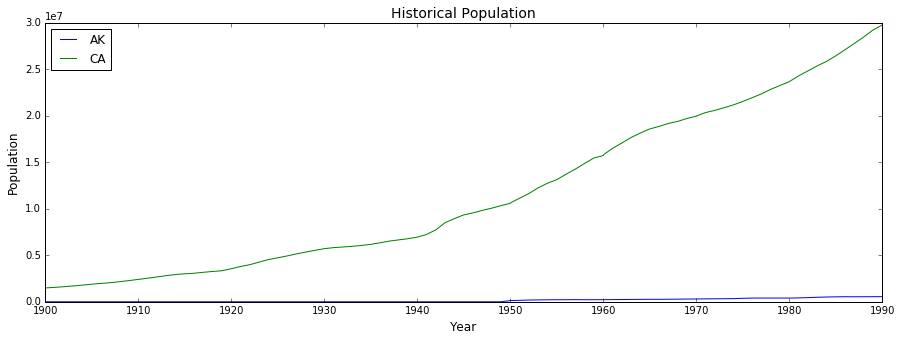

In [50]:
plt.figure(figsize=(15,5))
plt.plot(year,AK)
plt.plot(year,CA)
plt.title('Historical Population',fontsize=14)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Population',fontsize=12)
plt.legend(['AK','CA'], loc=0)

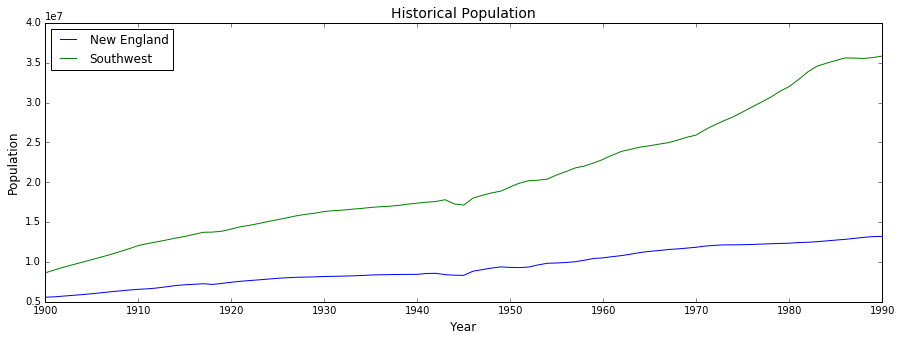

In [56]:
plt.figure(figsize=(15,5))
plt.plot(year,New_England)
plt.plot(year,Southwest)
plt.title('Historical Population',fontsize=14)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Population',fontsize=12)
plt.legend(['New England','Southwest'], loc=0)

#<center>Problem 4

In [107]:
header = ['label','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
            'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
            'Hue', 'OD280/OD315 of diluted wines', 'Proline']

header2 = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
            'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
            'Hue', 'OD280/OD315 of diluted wines', 'Proline']

Import wine dataset and dropping NaN rows

In [108]:
dataset = pd.read_csv('wine.data', names = header)
dataset = dataset.dropna()
dataset.head()

,label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Splitting randomized dataset into 75% train and 25% test

In [109]:
train = dataset.sample(frac=.75)
test = dataset[~dataset.isin(train).all(1)]

Use Decision Tree Classifier to predict

In [110]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(train.ix[:,1:].values, train['label'].values)

real = test['label']
pred = classifier.predict(test.ix[:,1:].values)

Construct Confusion Matrix

In [119]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greens):
    label_names = dataset['label'].unique()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(label_names))
    plt.xticks(tick_marks, label_names, rotation=45)
    plt.yticks(tick_marks, label_names)
    plt.tight_layout()
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)

Error:	5%

Confusion matrix, without normalization
[[11  3  0]
 [ 1 16  1]
 [ 0  0 12]]

Normalized confusion matrix
[[ 0.79  0.21  0.  ]
 [ 0.06  0.89  0.06]
 [ 0.    0.    1.  ]]



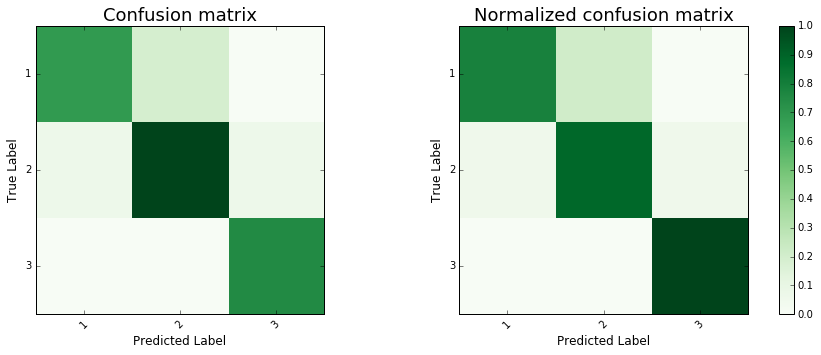

In [120]:
#Print Score
print 'Error:\t'+str(sum(real!=pred))+'%'
print

#Confusion Matrix
cm = metrics.confusion_matrix(real, pred)
np.set_printoptions(precision=2)
print 'Confusion matrix, without normalization'
print(cm)
print 
# Normalize the confusion matrix by row (i.e by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print 'Normalized confusion matrix'
print cm_normalized
print
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plot_confusion_matrix(cm)
plt.subplot(1,2,2)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

####Decision Tree

In [69]:
#Export .dot file
tree.export_graphviz(classifier, out_file='hw1.dot', feature_names=header2)

Converted hw1.dot to hw1.jpeg using the following pydot command:

<b>dot -Tjpeg -o hw1.jpeg -v hw1.dot</b>

Image of Tree Classifier:

<img src="hw1.jpeg">

#<center>Problem 5

In [81]:
dataset = pd.read_csv('AHW_1.csv')
dataset.head()

,Total,Sport,Age,Height,Weight,Sex
0,0,Judo,23,170.0,60.0,M
1,0,Athletics,33,193.0,125.0,M
2,0,Athletics,30,187.0,76.0,M
3,0,Boxing,24,NaN,NaN,M
4,0,Athletics,26,178.0,85.0,F


What are the statistical distributions of variables using no class?

In [82]:
dataset.describe()

,Total,Age,Height,Weight
count,10384.000000,10384.000000,9823.000000,9104.000000
mean,0.052196,26.068856,176.907869,72.852812
std,0.250149,5.440561,11.295433,16.067462
min,0.000000,13.000000,132.000000,36.000000
25%,0.000000,22.000000,169.000000,61.000000
50%,0.000000,25.000000,177.000000,70.000000
75%,0.000000,29.000000,185.000000,81.000000
max,5.000000,71.000000,221.000000,218.000000


How much missing data is there?

In [83]:
dataset.isnull().sum()

Total        0
Sport        0
Age          0
Height     561
Weight    1280
Sex          0
dtype: int64

How do distributions differ by each gender?

Describe summary statistics for each attribute.

Plot each one of the attributes distributions.

Are any of the variables different for male vs. female athletes?

Male
            Total           Age       Height       Weight
count  5017.000000  5017.000000  5017.000000  5017.000000
mean      0.050628    26.770979   182.922464    80.593183
std       0.245835     5.548824     9.872117    15.400855
min       0.000000    15.000000   140.000000    42.000000
25%       0.000000    23.000000   176.000000    70.000000
50%       0.000000    26.000000   183.000000    78.000000
75%       0.000000    30.000000   190.000000    89.000000
max       5.000000    71.000000   221.000000   218.000000


Female
            Total           Age       Height       Weight
count  4021.000000  4021.000000  4021.000000  4021.000000
mean      0.060433    25.855757   170.637404    63.208903
std       0.271496     5.303485     8.758611    10.802622
min       0.000000    13.000000   132.000000    36.000000
25%       0.000000    22.000000   165.000000    56.000000
50%       0.000000    25.000000   170.000000    62.000000
75%       0.000000    29.000000   176.000000    69.000000


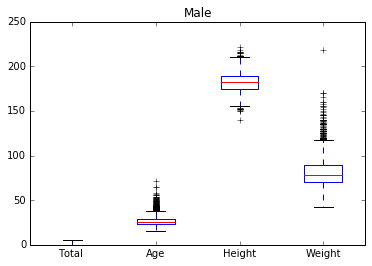

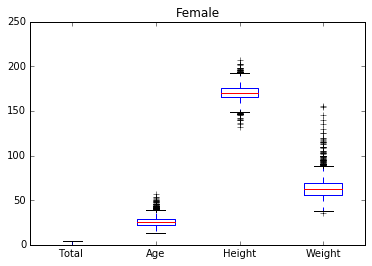

In [84]:
print 'Male'
print dataset[dataset['Sex']=='M'].dropna().describe()
print '\n'
print 'Female'
print dataset[dataset['Sex']=='F'].dropna().describe()

plt.figure()
dataset[dataset['Sex']=='M'].plot(kind='box', title='Male')
plt.figure()
dataset[dataset['Sex']=='F'].plot(kind='box', title='Female')

There is a greater variation in height and weight among male athletes compared to female athletes.

Male athletes also weigh more and are taller on average.

Visualize potential difference via the scatter plots.
Are there any ‘high’ correlations between variables?

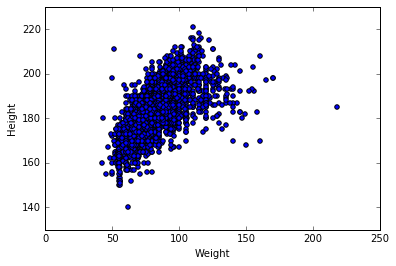

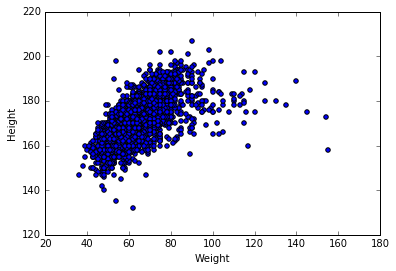

In [85]:
dataset[dataset['Sex']=='M'].plot(kind='scatter',x='Weight',y='Height')
dataset[dataset['Sex']=='F'].plot(kind='scatter',x='Weight',y='Height')

Height and wieght are not highly correlated for either gender.

Create a new variable for the weight in lbs.

Check out the correlations again.

Do you notice any changes?

In [86]:
dataset['Weight_lbs'] = dataset['Weight']*2.20462

Male


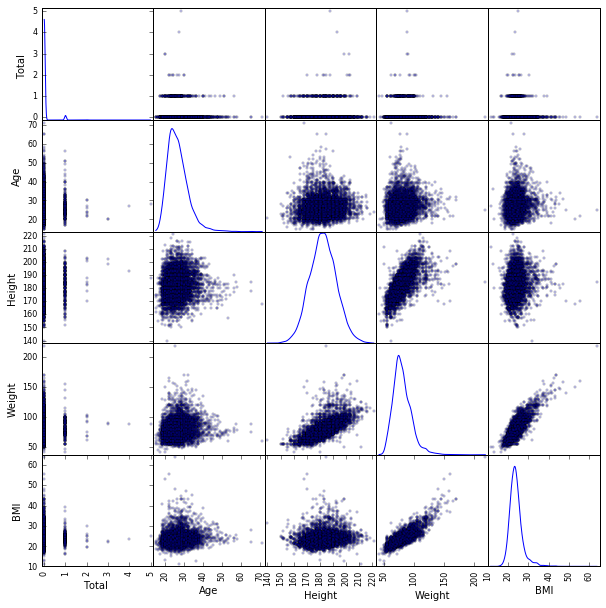

In [104]:
print 'Male';
pd.scatter_matrix(dataset[dataset['Sex'] == 'M'], alpha=0.2, figsize=(10, 10), diagonal='kde');

Female


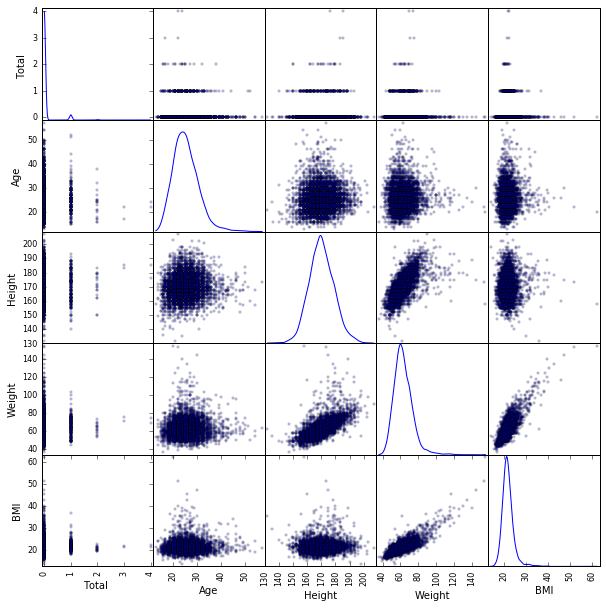

In [105]:
print 'Female';
pd.scatter_matrix(dataset[dataset['Sex'] == 'F'], alpha=0.2, figsize=(10, 10), diagonal='kde');

There is no significant difference in correlation due to the weight conversion.

Remove one of the weight variables. Add new variable weight + height. Visualize scatter plot.

In [89]:
dataset = dataset.drop('Weight_lbs', 1)
dataset['weight+height'] = dataset['Weight']+dataset['Height']

Male


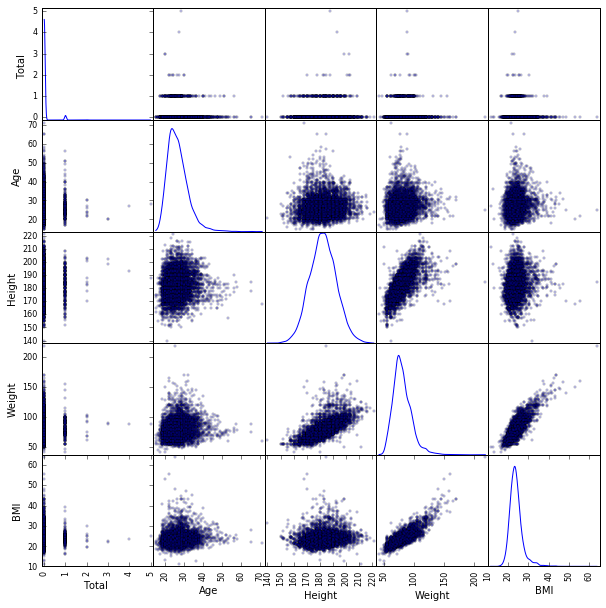

In [98]:
print 'Male';
pd.scatter_matrix(dataset[dataset['Sex'] == 'M'], alpha=0.2, figsize=(10, 10), diagonal='kde')

Female


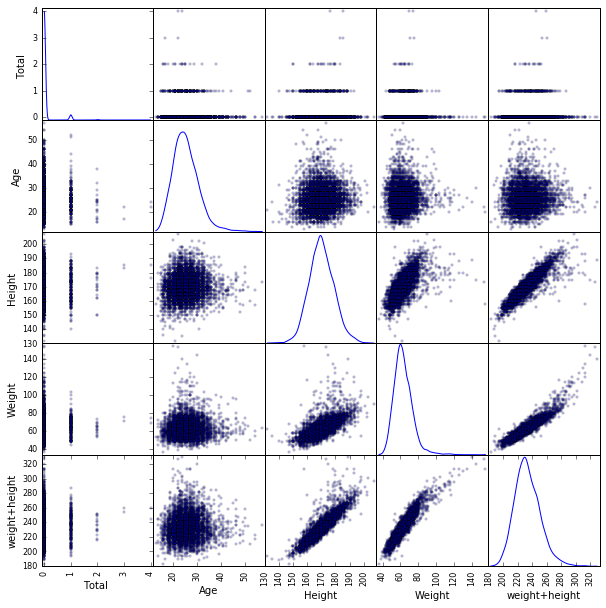

In [91]:
print 'Female';
pd.scatter_matrix(dataset[dataset['Sex'] == 'F'], alpha=0.2, figsize=(10, 10), diagonal='kde');

Repeat the same exercise for Body Mass Index defined as Mass (kg)/Height(m)^2 
(Note: Weight already in Kg. and Height is in cm). 

Is this a useful variable? 

Plot the BMI of the athletes. 

Are there any obese athletes? Male of Female?

count    5017.000000
mean       23.961976
std         3.387829
min        11.455268
25%        21.913806
50%        23.510204
75%        25.237205
max        63.696129
Name: BMI, dtype: float64 

count    4021.000000
mean       21.637999
std         2.820028
min        13.774105
25%        20.047446
50%        21.296296
75%        22.758307
max        62.089409
Name: BMI, dtype: float64


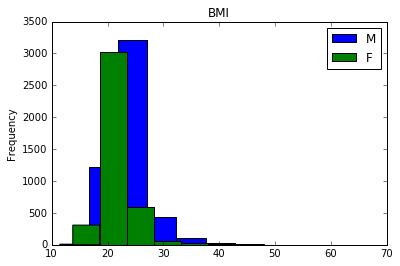

In [92]:
dataset = dataset.drop('weight+height', 1) 
dataset['BMI'] = dataset['Weight'] / (dataset['Height']*10**-2)**2

print dataset[dataset['Sex']=='M']['BMI'].describe(), '\n'
print dataset[dataset['Sex']=='F']['BMI'].describe()

dataset[dataset['Sex']=='M']['BMI'].plot(kind='hist')
dataset[dataset['Sex']=='F']['BMI'].plot(kind='hist')
plt.legend(['M','F'])
plt.title('BMI')

Visualize scatterplots of Total Class with Height, Weight, Sex and BMI.

Male


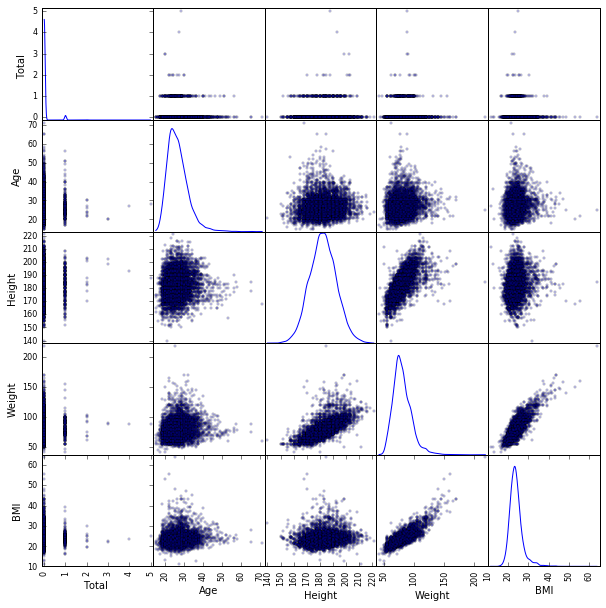

In [102]:
print 'Male';
pd.scatter_matrix(dataset[dataset['Sex'] == 'M'], alpha=0.2, figsize=(10, 10), diagonal='kde');

Female


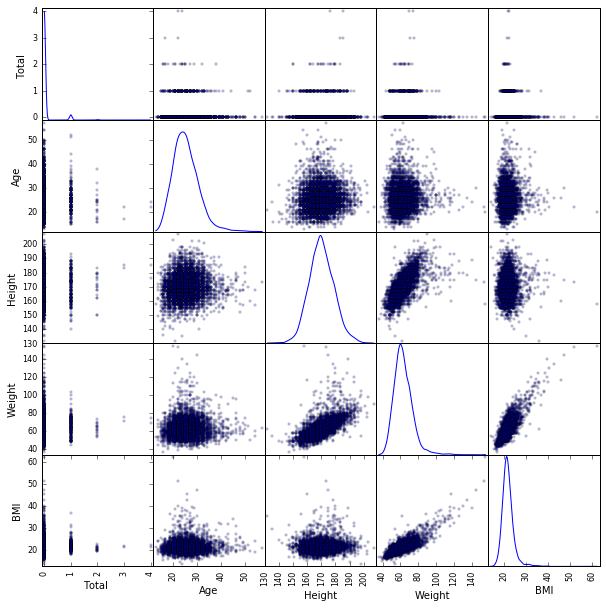

In [103]:
print 'Female';
pd.scatter_matrix(dataset[dataset['Sex'] == 'F'], alpha=0.2, figsize=(10, 10), diagonal='kde');

Split data by sport. What can you conclude based on the split?

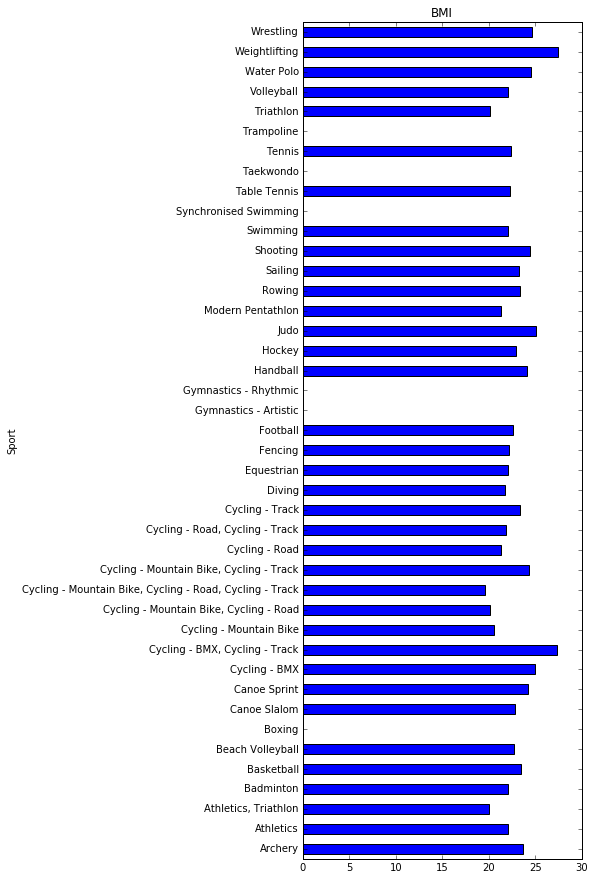

In [95]:
sport = dataset.groupby('Sport')
plt.figure(figsize=(5,15))
plt.title('BMI')
sport['BMI'].mean().plot(kind='barh')